In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from sklearn.metrics import roc_curve, auc

In [2]:
from helpful_functions import generate_data, encode_columns, plot_corr, distance_beetween_two_matrix, tsne_visualization, evaluate

/home/datalab/miniconda3/envs/sergei_chirkov/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Prepare data: Mushrooms

In [3]:
orig_data = pd.read_csv("agaricus-lepiota.data")
print(orig_data.shape)
orig_data.head()

(8123, 23)


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
metadata_mushrooms = {'fields':
                    {
                      'p': {'type': 'categorical'},
                      'x': {'type': 'categorical'},
                      's': {'type': 'categorical'},
                      'n': {'type': 'categorical'},
                      't': {'type': 'categorical'},
                      'p.1': {'type': 'categorical'},
                      'f': {'type': 'categorical'},
                      'c': {'type': 'categorical'},
                      'n.1': {'type': 'categorical'},
                      'k': {'type': 'categorical'},
                      'e': {'type': 'categorical'},
                      'e.1': {'type': 'categorical'},
                      's.1': {'type': 'categorical'},
                      's.2': {'type': 'categorical'},
                      'w': {'type': 'categorical'},
                      'w.1': {'type': 'categorical'},
                      'p.2': {'type': 'categorical'},
                      'w.2': {'type': 'categorical'},
                      'o': {'type': 'categorical'},
                      'p.3': {'type': 'categorical'},
                      'k.1': {'type': 'categorical'},
                      's.3': {'type': 'categorical'},
                      'u': {'type': 'categorical'}
                    }}

categorical_cols = ['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u']

# CopulaGAN

In [5]:
synt_data = generate_data(orig_data, "CopulaGan", 8123)

In [6]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_mushrooms)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.14it/s]


Overall Quality Score: 90.26%

Properties:
Column Shapes: 93.15%
Column Pair Trends: 87.38%


,Column,Metric,Quality Score
0,p,TVComplement,0.965284
1,x,TVComplement,0.909024
2,s,TVComplement,0.890188
3,n,TVComplement,0.936230
4,t,TVComplement,0.992367
5,p.1,TVComplement,0.878739
6,f,TVComplement,0.959498
7,c,TVComplement,0.930814
8,n.1,TVComplement,0.998523
9,k,TVComplement,0.901022


In [7]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
#tsne_visualization(encoded_orig_data, "p")

In [8]:
encoded_synt_data = encode_columns(synt_data, categorical_cols)
#tsne_visualization(encoded_synt_data, "p")

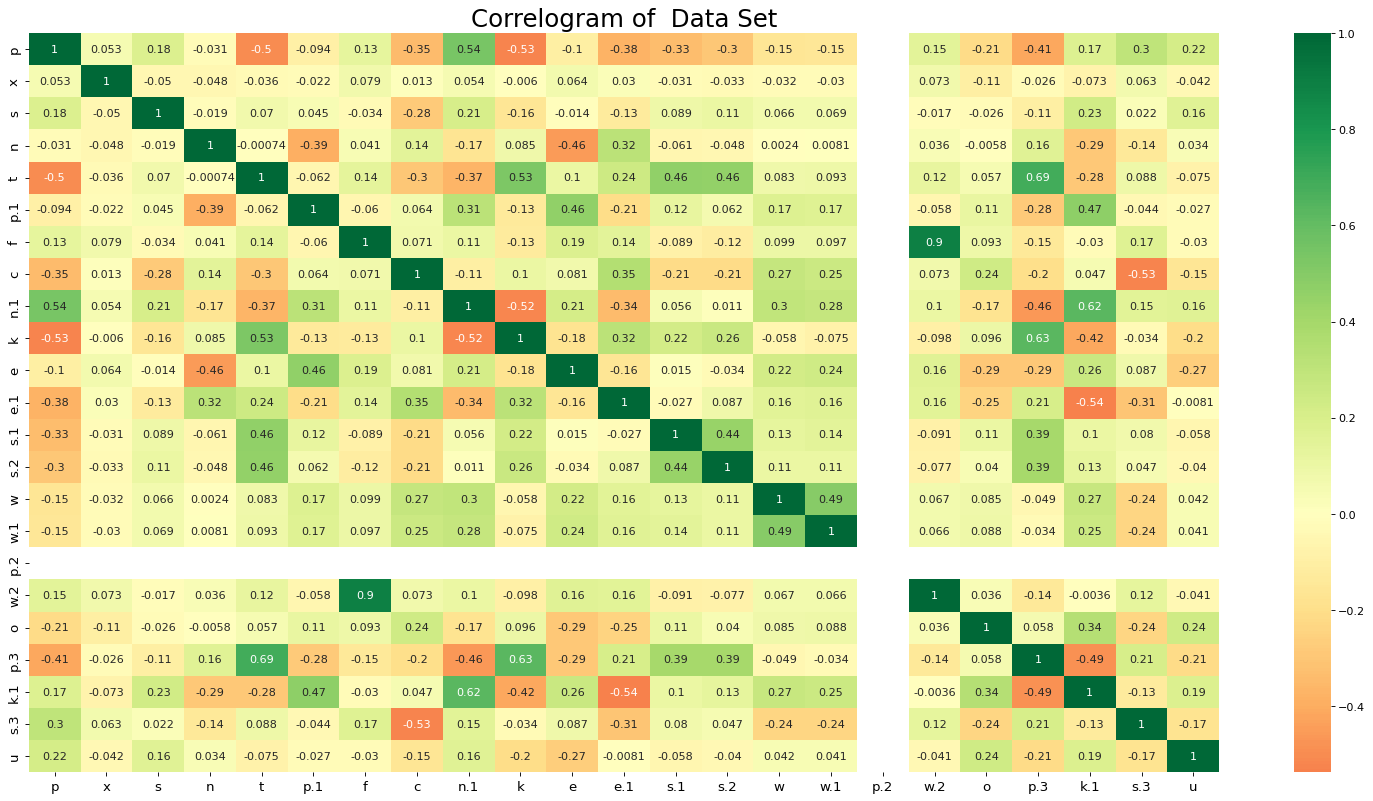

In [9]:
plot_corr(encoded_orig_data)

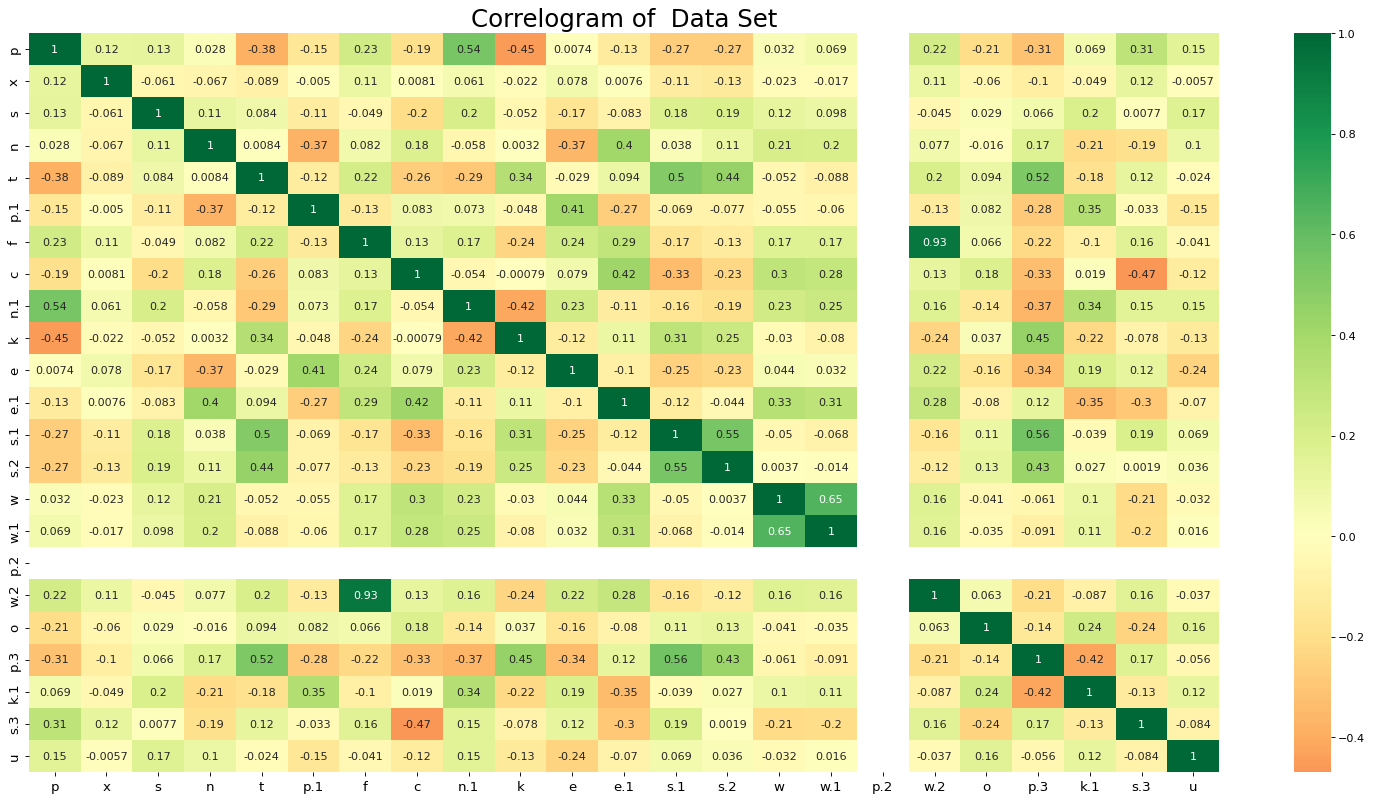

In [10]:
plot_corr(encoded_synt_data)

In [11]:
distance_beetween_two_matrix(encoded_orig_data, encoded_synt_data)

1.3812131485677737e-05

In [12]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'CopulaGan', 8123, 'p', categorical_cols)

/home/datalab/miniconda3/envs/sergei_chirkov/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [13]:
r1.mean()

1.0

In [14]:
r2.mean()

0.9094042343673067

In [15]:
r3.mean()

0.9252584933530279

In [16]:
r4.mean()

0.896602658788774